### grp

# Course: _Analyzing IoT Data in Python_:
1.  accessing iot data
2.  processing iot data
3.  analyzing iot data
4.  ml for iot

## _1. Accessing IoT Data_:
- via api endpoints, devices, and data streams
- MQTT (Message Queuing Telemetry Transport):
    -  message protocol
    -  publish / subscribe
    -  acts as a message broker
- Client (ex: Eclipse Paho MQTT Python Client):
    -  connects to a broker
    -  publishes data
    -  subscribes to topics

#### consume temp data via requests endpoint

In [1]:
import requests
import pandas as pd

URL = "https://assets.datacamp.com/production/\
repositories/4296/datasets/8f6b478697a8d05e10b7d535af67154549a4f38f/\
environ_MS83200MS_airtemp_600_30r.json"
res = requests.get(URL)

data_temp = res.json()
print(data_temp)

df_temp = pd.DataFrame(data_temp)
print(df_temp.head())

[{'timestamp': 1535764800000, 'value': 15.8}, {'timestamp': 1535765400000, 'value': 15.7}, {'timestamp': 1535766000000, 'value': 15.7}, {'timestamp': 1535766600000, 'value': 15.6}, {'timestamp': 1535767200000, 'value': 15.7}, {'timestamp': 1535767800000, 'value': 15.7}, {'timestamp': 1535768400000, 'value': 15.8}, {'timestamp': 1535769000000, 'value': 15.7}, {'timestamp': 1535769600000, 'value': 15.9}, {'timestamp': 1535770200000, 'value': 15.7}, {'timestamp': 1535770800000, 'value': 15.6}, {'timestamp': 1535771400000, 'value': 15.4}, {'timestamp': 1535772000000, 'value': 15.4}, {'timestamp': 1535772600000, 'value': 15.2}, {'timestamp': 1535773200000, 'value': 14.6}, {'timestamp': 1535773800000, 'value': 14.5}, {'timestamp': 1535774400000, 'value': 14.4}, {'timestamp': 1535775000000, 'value': 14.2}, {'timestamp': 1535775600000, 'value': 14.2}, {'timestamp': 1535776200000, 'value': 14.2}, {'timestamp': 1535776800000, 'value': 14.2}, {'timestamp': 1535777400000, 'value': 14.1}, {'timesta

#### consume temp data via pandas api

In [2]:
import pandas as pd

df_temp = pd.read_json(URL)

print(df_temp.head())
print(df_temp.dtypes)

            timestamp  value
0 2018-09-01 01:20:00   15.8
1 2018-09-01 01:30:00   15.7
2 2018-09-01 01:40:00   15.7
3 2018-09-01 01:50:00   15.6
4 2018-09-01 02:00:00   15.7
timestamp    datetime64[ns]
value               float64
dtype: object


#### store data

In [3]:
import pandas as pd

df_temp = pd.read_json(URL)

df_temp.to_json("./temperature.json", orient="records")
df_temp.to_csv("./temperature.csv", index=False)

In [4]:
! head temperature.csv

timestamp,value
2018-09-01 01:20:00,15.8
2018-09-01 01:30:00,15.7
2018-09-01 01:40:00,15.7
2018-09-01 01:50:00,15.6
2018-09-01 02:00:00,15.7
2018-09-01 02:10:00,15.7
2018-09-01 02:20:00,15.8
2018-09-01 02:30:00,15.7
2018-09-01 02:40:00,15.9


In [5]:
! head temperature.json

[{"timestamp":1535764800000,"value":15.8},{"timestamp":1535765400000,"value":15.7},{"timestamp":1535766000000,"value":15.7},{"timestamp":1535766600000,"value":15.6},{"timestamp":1535767200000,"value":15.7},{"timestamp":1535767800000,"value":15.7},{"timestamp":1535768400000,"value":15.8},{"timestamp":1535769000000,"value":15.7},{"timestamp":1535769600000,"value":15.9},{"timestamp":1535770200000,"value":15.7},{"timestamp":1535770800000,"value":15.6},{"timestamp":1535771400000,"value":15.4},{"timestamp":1535772000000,"value":15.4},{"timestamp":1535772600000,"value":15.2},{"timestamp":1535773200000,"value":14.6},{"timestamp":1535773800000,"value":14.5},{"timestamp":1535774400000,"value":14.4},{"timestamp":1535775000000,"value":14.2},{"timestamp":1535775600000,"value":14.2},{"timestamp":1535776200000,"value":14.2},{"timestamp":1535776800000,"value":14.2},{"timestamp":1535777400000,"value":14.1},{"timestamp":1535778000000,"value":14.0},{"timestamp":1535778600000,"value":14.1},{"timestamp":15

#### read data

In [6]:
import pandas as pd

df_temp = pd.read_csv("temperature.csv", parse_dates=["timestamp"])

print(df_temp.head())
print("\n")
print(df_temp.info())

df_temp = pd.read_json("temperature.json")
print(df_temp.head())
print("\n")
print(df_temp.info())

            timestamp  value
0 2018-09-01 01:20:00   15.8
1 2018-09-01 01:30:00   15.7
2 2018-09-01 01:40:00   15.7
3 2018-09-01 01:50:00   15.6
4 2018-09-01 02:00:00   15.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
timestamp    30 non-null datetime64[ns]
value        30 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 560.0 bytes
None
            timestamp  value
0 2018-09-01 01:20:00   15.8
1 2018-09-01 01:30:00   15.7
2 2018-09-01 01:40:00   15.7
3 2018-09-01 01:50:00   15.6
4 2018-09-01 02:00:00   15.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
timestamp    30 non-null datetime64[ns]
value        30 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 560.0 bytes
None


#### describe data

In [7]:
df_temp.describe()

,value
count,30.000000
mean,14.873333
std,0.745068
min,14.000000
25%,14.200000
50%,14.550000
75%,15.700000
max,15.900000


#### MQTT single message

In [8]:
"""
import paho.mqtt.subscribe as subscribe

# Retrieve one message
msg = subscribe.simple("datacamp/iot/simple", hostname="mqtt.datacamp.com")

# Print topic and payload
print(f"{msg.topic}, {msg.payload}")
"""

'\nimport paho.mqtt.subscribe as subscribe\n\n# Retrieve one message\nmsg = subscribe.simple("datacamp/iot/simple", hostname="mqtt.datacamp.com")\n\n# Print topic and payload\nprint(f"{msg.topic}, {msg.payload}")\n'

#### append data stream to dataframe

In [9]:
def on_message(client, userdata, message):
    """
    : client => client instance for callback
    : userdata => private user data
    : message => MQTTMessage instance
    """
    # Parse the message.payload
    data = json.loads(message.payload)
    store.append(data)

"""
topic = "paho/test/iot_course"
MQTT_HOST = "testmqtt.datacamp.com"
# Connect function to mqtt datastream
subscribe.callback(on_message, topic, hostname=MQTT_HOST)

df = pd.DataFrame(store)
print(df.head())

# Store DataFrame to csv, skipping the index
df.to_csv("datastream.csv", index=False)
"""

'\ntopic = "paho/test/iot_course"\nMQTT_HOST = "testmqtt.datacamp.com"\n# Connect function to mqtt datastream\nsubscribe.callback(on_message, topic, hostname=MQTT_HOST)\n\ndf = pd.DataFrame(store)\nprint(df.head())\n\n# Store DataFrame to csv, skipping the index\ndf.to_csv("datastream.csv", index=False)\n'

## _2. Processing IoT Data_:
-  time series
-  missing data values:
    -  reason:
        -  unstable network connection
        -  no power
        -  other external factors
    -  fixes:
        -  drop nulls
        -  fill w/ mean or median
        -  forward-fill
        -  backward-fill
-  timestamps:
    -  timestamp in the payload is the closest time to the measurement then broker timestamp is next closest

#### line plots

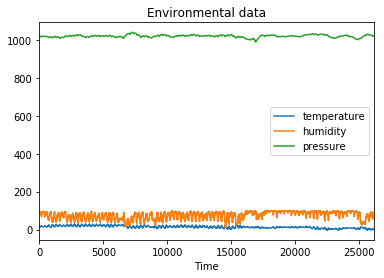

In [50]:
import matplotlib.pyplot as plt
df = pd.read_json("/Users/grp/Documents/BIGDATA/DATACAMP/\
otherCourses/iot/environ_MS83200MS_nowind_3m-10min.json")

remove_nulls_df = df.dropna()
cols = ["temperature", "humidity", "pressure"]

remove_nulls_df[cols].plot(title="Environmental data")
plt.xlabel("Time")
plt.show()

In [11]:
df.head()

,humidity,precipitation,pressure,radiation,sunshine,temperature,timestamp
0,95.6,0.0,1016.3,0.0,599.2,16.1,2018-09-01 00:00:00
1,NaN,0.1,NaN,NaN,NaN,NaN,2018-09-01 00:05:00
2,95.5,0.0,1016.4,0.0,600.0,16.1,2018-09-01 00:10:00
3,NaN,0.0,NaN,NaN,NaN,NaN,2018-09-01 00:15:00
4,95.2,0.0,1016.5,0.0,598.9,16.1,2018-09-01 00:20:00


In [12]:
remove_nulls_df.head()

,humidity,precipitation,pressure,radiation,sunshine,temperature,timestamp
0,95.6,0.0,1016.3,0.0,599.2,16.1,2018-09-01 00:00:00
2,95.5,0.0,1016.4,0.0,600.0,16.1,2018-09-01 00:10:00
4,95.2,0.0,1016.5,0.0,598.9,16.1,2018-09-01 00:20:00
6,95.1,0.0,1016.4,0.0,600.0,16.1,2018-09-01 00:30:00
8,95.3,0.0,1016.3,0.0,600.0,16.1,2018-09-01 00:40:00


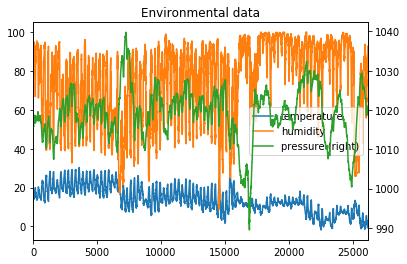

In [13]:
cols = ["temperature", "humidity", "pressure"]

remove_nulls_df[cols].plot(title="Environmental data",
              secondary_y="pressure")

plt.xlabel("Time")
plt.show()

#### histogram plot

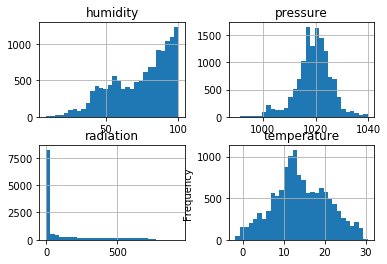

In [14]:
cols = ["temperature", "humidity", "pressure", "radiation"]

df[cols].hist(bins=30)
plt.ylabel("Frequency")
plt.show()

#### forward fill data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26175 entries, 0 to 26174
Data columns (total 7 columns):
humidity         13085 non-null float64
precipitation    26162 non-null float64
pressure         13085 non-null float64
radiation        13085 non-null float64
sunshine         13083 non-null float64
temperature      13059 non-null float64
timestamp        26175 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [16]:
print(df.head())

ffill_df = df.fillna(method="ffill")
ffill_df.head()

   humidity  precipitation  pressure  radiation  sunshine  temperature  \
0      95.6            0.0    1016.3        0.0     599.2         16.1   
1       NaN            0.1       NaN        NaN       NaN          NaN   
2      95.5            0.0    1016.4        0.0     600.0         16.1   
3       NaN            0.0       NaN        NaN       NaN          NaN   
4      95.2            0.0    1016.5        0.0     598.9         16.1   

            timestamp  
0 2018-09-01 00:00:00  
1 2018-09-01 00:05:00  
2 2018-09-01 00:10:00  
3 2018-09-01 00:15:00  
4 2018-09-01 00:20:00  


,humidity,precipitation,pressure,radiation,sunshine,temperature,timestamp
0,95.6,0.0,1016.3,0.0,599.2,16.1,2018-09-01 00:00:00
1,95.6,0.1,1016.3,0.0,599.2,16.1,2018-09-01 00:05:00
2,95.5,0.0,1016.4,0.0,600.0,16.1,2018-09-01 00:10:00
3,95.5,0.0,1016.4,0.0,600.0,16.1,2018-09-01 00:15:00
4,95.2,0.0,1016.5,0.0,598.9,16.1,2018-09-01 00:20:00


#### count missing values

In [17]:
print(df.isna().sum())

humidity         13090
precipitation       13
pressure         13090
radiation        13090
sunshine         13092
temperature      13116
timestamp            0
dtype: int64


#### resample data to search for gap periods of time w/o data

In [18]:
select_df = df[["timestamp", "temperature", "humidity"]]
index_df = select_df.set_index('timestamp')
index_df = index_df.loc["2018-11-05 00:00:00":"2018-11-11 00:00:00"]
data_res = index_df.resample("10min").last()
print(data_res.isna().sum())

temperature    0
humidity       0
dtype: int64


In [19]:
data_res.head()

,temperature,humidity
timestamp,,
2018-11-05 00:00:00,11.8,96.5
2018-11-05 00:10:00,11.6,96.9
2018-11-05 00:20:00,11.6,97.1
2018-11-05 00:30:00,11.6,97.0
2018-11-05 00:40:00,11.6,97.3


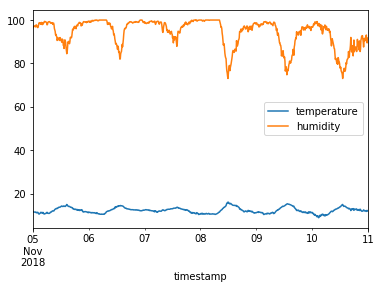

In [20]:
# should be showing gaps
data_res.plot()
plt.show()

#### cache datastream

In [21]:
cache = []
MAX_CACHE = 15

def on_message(client, userdata, message):
 	# Combine timestamp and payload
    data = f"{message.timestamp},{message.payload}"
    # Append data to cache
    cache.append(data)
    # Check cache length
    if len(cache) > MAX_CACHE:
        with Path("energy.txt").open("a") as f:
            # Save to file
            f.writelines(cache)
        # reset cache
        cache.clear()

"""
# Connect function to mqtt datastream
subscribe.callback(on_message, topics="datacamp/energy", hostname=MQTT_HOST)
"""

'\n# Connect function to mqtt datastream\nsubscribe.callback(on_message, topics="datacamp/energy", hostname=MQTT_HOST)\n'

#### convert timestamp col into datetime object

In [22]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

print(df.dtypes)
print(df.head())

humidity                float64
precipitation           float64
pressure                float64
radiation               float64
sunshine                float64
temperature             float64
timestamp        datetime64[ns]
dtype: object
   humidity  precipitation  pressure  radiation  sunshine  temperature  \
0      95.6            0.0    1016.3        0.0     599.2         16.1   
1       NaN            0.1       NaN        NaN       NaN          NaN   
2      95.5            0.0    1016.4        0.0     600.0         16.1   
3       NaN            0.0       NaN        NaN       NaN          NaN   
4      95.2            0.0    1016.5        0.0     598.9         16.1   

            timestamp  
0 2018-09-01 00:00:00  
1 2018-09-01 00:05:00  
2 2018-09-01 00:10:00  
3 2018-09-01 00:15:00  
4 2018-09-01 00:20:00  


#### melt

In [23]:
melt_df = pd.melt(df, id_vars=['timestamp'], value_vars=['humidity',\
                                                         'precipitation',\
                                                         'pressure',\
                                                         'radiation',\
                                                         'sunshine',\
                                                         'temperature'])

melt_df.head()

,timestamp,variable,value
0,2018-09-01 00:00:00,humidity,95.6
1,2018-09-01 00:05:00,humidity,NaN
2,2018-09-01 00:10:00,humidity,95.5
3,2018-09-01 00:15:00,humidity,NaN
4,2018-09-01 00:20:00,humidity,95.2


#### pivot

In [24]:
pivot_df = pd.pivot_table(melt_df, columns="variable", values="value", index="timestamp")

pivot_df.head()

variable,humidity,precipitation,pressure,radiation,sunshine,temperature
timestamp,,,,,,
2018-09-01 00:00:00,95.6,0.0,1016.3,0.0,599.2,16.1
2018-09-01 00:05:00,NaN,0.1,NaN,NaN,NaN,NaN
2018-09-01 00:10:00,95.5,0.0,1016.4,0.0,600.0,16.1
2018-09-01 00:15:00,NaN,0.0,NaN,NaN,NaN,NaN
2018-09-01 00:20:00,95.2,0.0,1016.5,0.0,598.9,16.1


#### resample

In [25]:
resample_df = pivot_df.resample("15min").max().dropna()

resample_df.head()

variable,humidity,precipitation,pressure,radiation,sunshine,temperature
timestamp,,,,,,
2018-09-01 00:00:00,95.6,0.1,1016.4,0.0,600.0,16.1
2018-09-01 00:15:00,95.2,0.0,1016.5,0.0,598.9,16.1
2018-09-01 00:30:00,95.3,0.0,1016.4,0.0,600.0,16.1
2018-09-01 00:45:00,95.0,0.0,1016.1,0.0,598.5,16.0
2018-09-01 01:00:00,95.0,0.0,1016.1,0.0,600.0,16.0


#### diff

In [26]:
"""
df_diff = df.diff()

df_diff.plot()
plt.show()

# Resample df to 30 minutes
df_res = df.resample('30min').max()

# Get difference between values
df_diff = df_res.diff()

# Get the percent changed
df_pct = df_diff.pct_change()

# Plot the DataFrame
df_pct.plot()
plt.show()
"""

"\ndf_diff = df.diff()\n\ndf_diff.plot()\nplt.show()\n\n# Resample df to 30 minutes\ndf_res = df.resample('30min').max()\n\n# Get difference between values\ndf_diff = df_res.diff()\n\n# Get the percent changed\ndf_pct = df_diff.pct_change()\n\n# Plot the DataFrame\ndf_pct.plot()\nplt.show()\n"

## _3. Analyzing IoT Data_:
-  outliers:
    -  use 3 times the standard deviation hence datapoints outside of this threshold are considered outliers
-  time series components:
    -  trend
    -  seasonal
    -  residual (noise)

#### concat dataframes at column axis + resample

In [27]:
"""
temperature.columns = ["temperature"]
humidity.columns = ["humidity"]
windspeed.columns = ["windspeed"]

df_list = [temperature, humidity, windspeed]

environment = pd.concat(df_list, axis=1)

print(environment.head())

environ_traffic = pd.concat([environ, traffic], axis=1)

print(environ_traffic.head())

agg_dict = {"temperature": "max", "humidity": "max", "sunshine": "sum", 
            "light_veh": "sum", "heavy_veh": "sum",
            }

environ_traffic_resampled = environ_traffic.resample("1h").agg(agg_dict)
print(environ_traffic_resampled.head())
"""

'\ntemperature.columns = ["temperature"]\nhumidity.columns = ["humidity"]\nwindspeed.columns = ["windspeed"]\n\ndf_list = [temperature, humidity, windspeed]\n\nenvironment = pd.concat(df_list, axis=1)\n\nprint(environment.head())\n\nenviron_traffic = pd.concat([environ, traffic], axis=1)\n\nprint(environ_traffic.head())\n\nagg_dict = {"temperature": "max", "humidity": "max", "sunshine": "sum", \n            "light_veh": "sum", "heavy_veh": "sum",\n            }\n\nenviron_traffic_resampled = environ_traffic.resample("1h").agg(agg_dict)\nprint(environ_traffic_resampled.head())\n'

#### correlation

In [28]:
resample_df.corr()

variable,humidity,precipitation,pressure,radiation,sunshine,temperature
variable,,,,,,
humidity,1.000000,0.144540,-0.016262,-0.587668,-0.515597,-0.632286
precipitation,0.144540,1.000000,-0.278005,-0.075833,-0.060668,-0.050101
pressure,-0.016262,-0.278005,1.000000,0.026398,0.015863,-0.137069
radiation,-0.587668,-0.075833,0.026398,1.000000,0.747148,0.517365
sunshine,-0.515597,-0.060668,0.015863,0.747148,1.000000,0.534743
temperature,-0.632286,-0.050101,-0.137069,0.517365,0.534743,1.000000


#### pairplot

In [29]:
resample_df.head()

variable,humidity,precipitation,pressure,radiation,sunshine,temperature
timestamp,,,,,,
2018-09-01 00:00:00,95.6,0.1,1016.4,0.0,600.0,16.1
2018-09-01 00:15:00,95.2,0.0,1016.5,0.0,598.9,16.1
2018-09-01 00:30:00,95.3,0.0,1016.4,0.0,600.0,16.1
2018-09-01 00:45:00,95.0,0.0,1016.1,0.0,598.5,16.0
2018-09-01 01:00:00,95.0,0.0,1016.1,0.0,600.0,16.0


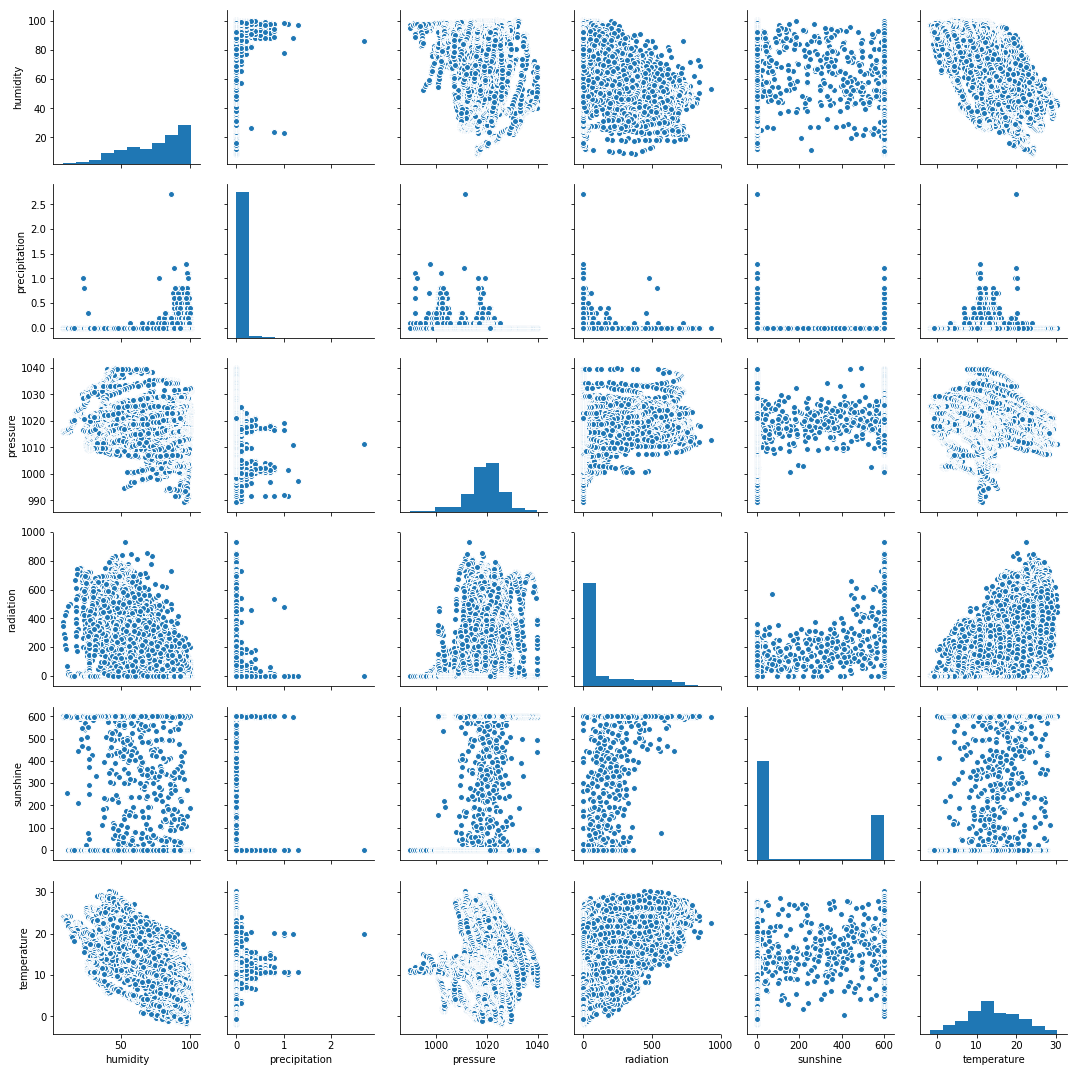

In [30]:
import seaborn as sns
sns.pairplot(resample_df)
plt.show()

#### outliers

In [31]:
stdev_df = resample_df[["temperature"]]
stdev_df.head()

variable,temperature
timestamp,
2018-09-01 00:00:00,16.1
2018-09-01 00:15:00,16.1
2018-09-01 00:30:00,16.1
2018-09-01 00:45:00,16.0
2018-09-01 01:00:00,16.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

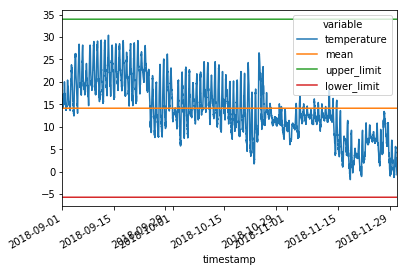

In [32]:
# mean
stdev_df["mean"] = stdev_df["temperature"].mean()

# upper and lower limits
stdev_df["upper_limit"] = stdev_df["mean"] + (stdev_df["temperature"].std() * 3)
stdev_df["lower_limit"] = stdev_df["mean"] - (stdev_df["temperature"].std() * 3)

stdev_df.plot()
plt.show()

#### autocorrelation

In [33]:
"""
stdev_df[:"2018-09-01"].plot()

plt.show()

from statsmodels.graphics import tsaplots
from pandas import datetools

# Plot autocorrelation
tsaplots.plot_acf(stdev_df["temperature"], lags=50)

# Show the plot
plt.show()
"""

'\nstdev_df[:"2018-09-01"].plot()\n\nplt.show()\n\nfrom statsmodels.graphics import tsaplots\nfrom pandas import datetools\n\n# Plot autocorrelation\ntsaplots.plot_acf(stdev_df["temperature"], lags=50)\n\n# Show the plot\nplt.show()\n'

#### seasonal decomposition

[0.16481776 0.30424276 0.34370526 ... 0.07196151 0.01040526 0.22385526]


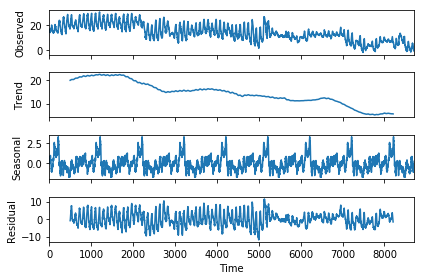

In [34]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(resample_df["temperature"].values, freq=1000)

print(res.seasonal)

res.plot()
plt.show()

In [35]:
"""
df_seas = resample_df.resample('1h').max().dropna()

decomp = sm.tsa.seasonal_decompose(df_seas.values, freq=1000)
plt.title("Temperature")
plt.plot(df_seas["temperature"], label="temperature")

plt.plot(decomp.trend["temperature"], label="trend")
plt.plot(decomp.seasonal["temperature"], label="seasonal")
plt.legend()
plt.show()
"""

'\ndf_seas = resample_df.resample(\'1h\').max().dropna()\n\ndecomp = sm.tsa.seasonal_decompose(df_seas.values, freq=1000)\nplt.title("Temperature")\nplt.plot(df_seas["temperature"], label="temperature")\n\nplt.plot(decomp.trend["temperature"], label="trend")\nplt.plot(decomp.seasonal["temperature"], label="seasonal")\nplt.legend()\nplt.show()\n'

## _4. Machine Learning for IoT_:
-  train/test split (test set must be on time series data after date used as "split" data
-  scale features to normalize
-  pipelines
-  apply to stream

#### train/test split

In [36]:
def show_start_end(df):
    return f"from {df.iloc[0].name} to {df.iloc[-1].name}"

In [37]:
import numpy as np

# create random binary label for classification example
resample_df['label'] = np.random.randint(0,2, size=len(resample_df))
resample_df.head()

variable,humidity,precipitation,pressure,radiation,sunshine,temperature,label
timestamp,,,,,,,
2018-09-01 00:00:00,95.6,0.1,1016.4,0.0,600.0,16.1,0
2018-09-01 00:15:00,95.2,0.0,1016.5,0.0,598.9,16.1,0
2018-09-01 00:30:00,95.3,0.0,1016.4,0.0,600.0,16.1,1
2018-09-01 00:45:00,95.0,0.0,1016.1,0.0,598.5,16.0,1
2018-09-01 01:00:00,95.0,0.0,1016.1,0.0,600.0,16.0,1


In [38]:
limit_day = "2018-11-15" # split date

train_env = resample_df[:limit_day]
test_env = resample_df[limit_day:]

print(show_start_end(train_env))
print(show_start_end(test_env))
print("\n")

print(train_env.shape)
print(test_env.shape)
print("\n")

X_train = train_env.drop("label", axis=1)
y_train = train_env["label"]
X_test = test_env.drop("label", axis=1)
y_test = test_env["label"]

print(X_train.shape)
print(y_train.shape)
print("\n")
print(X_test.shape)
print(y_test.shape)

from 2018-09-01 00:00:00 to 2018-11-15 23:45:00
from 2018-11-15 00:00:00 to 2018-11-30 23:00:00


(7270, 7)
(1533, 7)


(7270, 6)
(7270,)


(1533, 6)
(1533,)


#### logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.predict(X_test))

[1 1 1 ... 1 1 1]


#### model performance

In [40]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.5188445667125172
0.487279843444227


#### scale features

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(resample_df)

print(sc.mean_)
print(sc.var_)

[7.40775123e+01 1.20018376e-02 1.01919945e+03 1.22215264e+02
 1.91205869e+02 1.41241415e+01 5.07292983e-01]
[4.07843638e+02 5.57204640e-03 4.49816696e+01 4.18010179e+04
 7.59047287e+04 4.37617395e+01 2.49946812e-01]


In [42]:
def plot_unscaled_scaled(unscaled, scaled):
    from_date = "2018-11-10"
    to_date = "2018-11-15"
    plt.plot(unscaled.loc[from_date:to_date,["temperature"]], label="Temperature Unscaled")
    plt.plot(unscaled.loc[from_date:to_date,["humidity"]], label="Humidity Unscaled")
    plt.plot(scaled.loc[from_date:to_date,["temperature"]], label="Temperature Scaled")
    plt.plot(scaled.loc[from_date:to_date,["humidity"]], label="Humidity Scaled")
    plt.xlabel("Time")
    plt.ylabel("Units")
    plt.legend()
    plt.show()

variable             humidity  precipitation  pressure  radiation  sunshine  \
timestamp                                                                     
2018-09-01 00:00:00  1.065726       1.178871 -0.417402  -0.597767  1.483782   
2018-09-01 00:15:00  1.045919      -0.160783 -0.402492  -0.597767  1.479790   
2018-09-01 00:30:00  1.050871      -0.160783 -0.417402  -0.597767  1.483782   
2018-09-01 00:45:00  1.036016      -0.160783 -0.462133  -0.597767  1.478338   
2018-09-01 01:00:00  1.036016      -0.160783 -0.462133  -0.597767  1.483782   

variable             temperature     label  
timestamp                                   
2018-09-01 00:00:00     0.298682 -1.014694  
2018-09-01 00:15:00     0.298682 -1.014694  
2018-09-01 00:30:00     0.298682  0.985519  
2018-09-01 00:45:00     0.283565  0.985519  
2018-09-01 01:00:00     0.283565  0.985519  


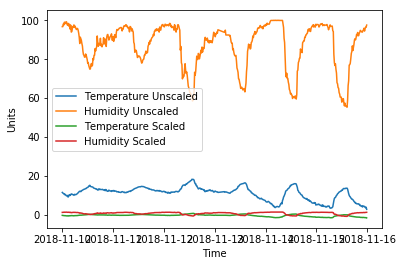

In [43]:
sc = StandardScaler()

sc.fit(resample_df)

data_scaled = sc.transform(resample_df)

data_scaled = pd.DataFrame(data_scaled, 
                              columns=resample_df.columns, 
                              index=resample_df.index)
print(data_scaled.head())
plot_unscaled_scaled(resample_df, data_scaled)

#### pipelines

In [44]:
from sklearn.pipeline import Pipeline

sc = StandardScaler()
logreg = LogisticRegression()

pl = Pipeline([
        ("scale", sc),
        ("logreg", logreg)
    ])

pl.fit(X_train, y_train)
print(pl.predict(X_test))

[1 1 1 ... 1 1 1]


#### save / load

In [45]:
import pickle

with open("./pipeline.pkl", "bw") as f:
    pickle.dump(pl, f)

with open("./pipeline.pkl", "br") as f:
    pl_loaded = pickle.load(f)
    
print(pl_loaded)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


#### predictions

In [46]:
predictions = pl.predict(X_test)
print(predictions)

[1 1 1 ... 1 1 1]


#### apply model to stream

In [47]:
def close_window(df, cat):
    print("Bad Weather. Making sure window is closed: Tem: {}, Wind-Speed: {}".format(df.iloc[0]["temperature"],\
                                                                                      df.iloc[0]["wind-speed"]))

In [48]:
def model_subscribe(client, userdata, message):
    data = json.loads(message.payload)
    df = pd.DataFrame.from_records([data], index="timestamp", columns=cols)
    category = pl.predict(df)
    if category[0] < 1:
        close_window(df, category[0])
    else:
        print("Nice Weather, nothing to do.")

# Subscribe model_subscribe to MQTT Topic
# subscribe.callback(model_subscribe, topic, hostname=MQTT_HOST)

In [49]:
"""
    Nice Weather, nothing to do.
    Bad Weather. Making sure window is closed: Tem: 4.1, Wind-Speed: 0.6000000000000001
    Nice Weather, nothing to do.
    Bad Weather. Making sure window is closed: Tem: 4.3, Wind-Speed: 0.7000000000000001
    Nice Weather, nothing to do.
    Nice Weather, nothing to do.
    Nice Weather, nothing to do.
    Nice Weather, nothing to do.
    Nice Weather, nothing to do.
    Bad Weather. Making sure window is closed: Tem: 5.5, Wind-Speed: 0.77
    Bad Weather. Making sure window is closed: Tem: 5.6, Wind-Speed: 1.37
    Bad Weather. Making sure window is closed: Tem: 5.5, Wind-Speed: 1.33
    Bad Weather. Making sure window is closed: Tem: 5.2, Wind-Speed: 0.91
    Bad Weather. Making sure window is closed: Tem: 5.2, Wind-Speed: 1.17
    Bad Weather. Making sure window is closed: Tem: 5.4, Wind-Speed: 1.24
    Bad Weather. Making sure window is closed: Tem: 5.3, Wind-Speed: 1.1
    Nice Weather, nothing to do.
    Bad Weather. Making sure window is closed: Tem: 4.8, Wind-Speed: 0.88
    Bad Weather. Making sure window is closed: Tem: 4.2, Wind-Speed: 0.30000000000000004
    Bad Weather. Making sure window is closed: Tem: 4.3, Wind-Speed: 1.04

"""

'\n    Nice Weather, nothing to do.\n    Bad Weather. Making sure window is closed: Tem: 4.1, Wind-Speed: 0.6000000000000001\n    Nice Weather, nothing to do.\n    Bad Weather. Making sure window is closed: Tem: 4.3, Wind-Speed: 0.7000000000000001\n    Nice Weather, nothing to do.\n    Nice Weather, nothing to do.\n    Nice Weather, nothing to do.\n    Nice Weather, nothing to do.\n    Nice Weather, nothing to do.\n    Bad Weather. Making sure window is closed: Tem: 5.5, Wind-Speed: 0.77\n    Bad Weather. Making sure window is closed: Tem: 5.6, Wind-Speed: 1.37\n    Bad Weather. Making sure window is closed: Tem: 5.5, Wind-Speed: 1.33\n    Bad Weather. Making sure window is closed: Tem: 5.2, Wind-Speed: 0.91\n    Bad Weather. Making sure window is closed: Tem: 5.2, Wind-Speed: 1.17\n    Bad Weather. Making sure window is closed: Tem: 5.4, Wind-Speed: 1.24\n    Bad Weather. Making sure window is closed: Tem: 5.3, Wind-Speed: 1.1\n    Nice Weather, nothing to do.\n    Bad Weather. Making

### grp